# Guitar Chords v2 dataset preprocessing

Mono

16 kHz

PCM16

### Imports

In [1]:
from pathlib import Path
from IPython.display import Audio
from numpy import random
import matplotlib.pyplot as plt
import soundfile as sf
import librosa
import numpy as np

### Functions

In [2]:
def plot_audio(audio, sr, title):
    fig = plt.figure(figsize=(6, 3))
    plt.plot(np.arange(len(audio))/sr, audio)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(alpha=0.4)
    plt.show()

def get_random_audio(lst_audio_paths):
    filepath = list(lst_audio_paths.iterdir())[random.randint(0, len(list(lst_audio_paths.iterdir()))-1)]
    y, orig_sr = librosa.load(filepath)
    return y, orig_sr, filepath

def apply_fade_out(audio_array, fade_duration_seconds=0.5, sampling_rate=16000):
    fade_samples = int(sampling_rate * fade_duration_seconds)
    fade_out_window = np.linspace(1, 0, fade_samples)
    faded_audio_array = audio_array.copy()
    faded_audio_array[-fade_samples:] *= fade_out_window
    return faded_audio_array

def add_silence(audio_array, silence_duration=3, sampling_rate=16000):
    silence_samples = int(sampling_rate * silence_duration)
    silence_array = np.zeros(silence_samples)
    audio_with_silence = np.concatenate((audio_array, silence_array))
    return audio_with_silence

### Input and output paths

In [3]:
original_dataset_path = Path('../datasets/guitar_chords_v2/original_test_set/audio_files/')
output_dataset_path   = Path('../datasets/guitar_chords_v2/preprocessed_original/audio_files/')
lst_audio_paths       = list(original_dataset_path.iterdir())

### Random sample to check and test functions

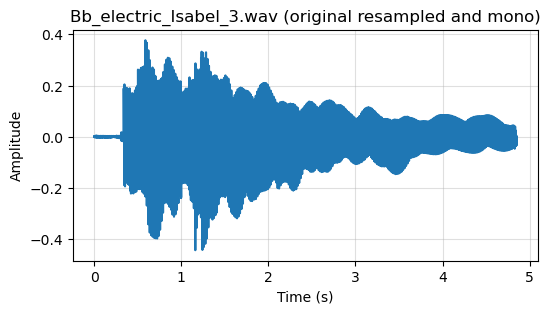

In [4]:
y, orig_sr, filepath = get_random_audio(original_dataset_path)
target_sr = 16000

y = y[0] if y.ndim>1 else y
y = librosa.resample(y, orig_sr=orig_sr, target_sr=target_sr)

plot_audio(y, target_sr, '{} (original resampled and mono)'.format(filepath.name))
Audio(data=y, rate=target_sr)

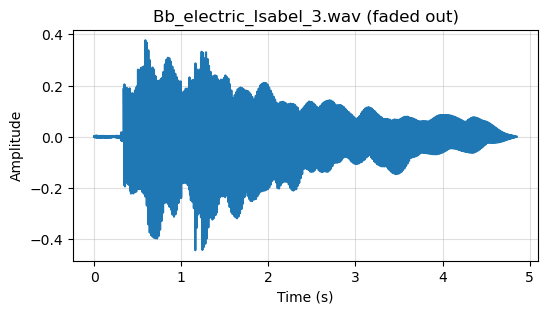

In [5]:
y = apply_fade_out(y, fade_duration_seconds=0.5, sampling_rate=target_sr)
plot_audio(y, target_sr, '{} (faded out)'.format(filepath.name))
Audio(data=y, rate=target_sr)

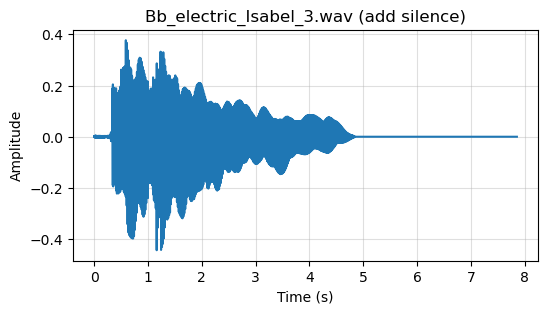

In [6]:
y = add_silence(y, silence_duration=3, sampling_rate=target_sr)
plot_audio(y, target_sr, '{} (add silence)'.format(filepath.name))
Audio(data=y, rate=target_sr)

### Running padronization on all audio files

In [7]:
target_sr  = 16000
target_pcm = 'PCM_16'

for filepath in lst_audio_paths:
    y, orig_sr = librosa.load(filepath)
    y = y[0] if y.ndim>1 else y
    y = librosa.resample(y, orig_sr=orig_sr, target_sr=target_sr)
    y = apply_fade_out(y, fade_duration_seconds=0.5, sampling_rate=target_sr)
    y = add_silence(y, silence_duration=3, sampling_rate=target_sr)
    sf.write(output_dataset_path/filepath.name, y, target_sr, target_pcm)